# Three generations seeking romance - Regression & Classification project

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("profiles.csv")

# EDA

In [3]:
df.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


In [4]:
df.shape

(60552, 31)

In [5]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [7]:
df["body_type"].value_counts()

average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: body_type, dtype: int64

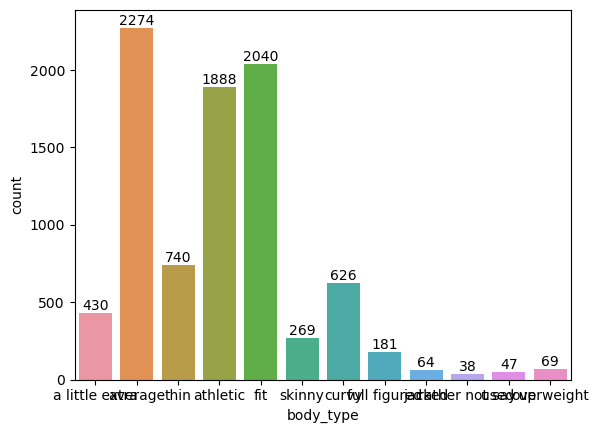

In [8]:
ax=sns.countplot(x=df["body_type"])
ax.bar_label(ax.containers[0]);

In [9]:
df["drinks"].value_counts()

socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: drinks, dtype: int64

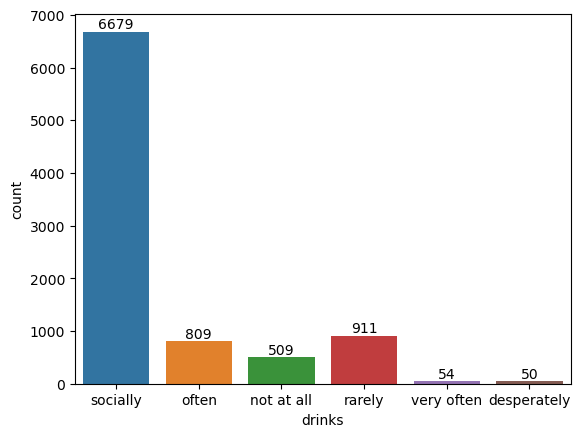

In [10]:
ax=sns.countplot(x=df["drinks"])
ax.bar_label(ax.containers[0]);

In [11]:
df["diet"].value_counts()

mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

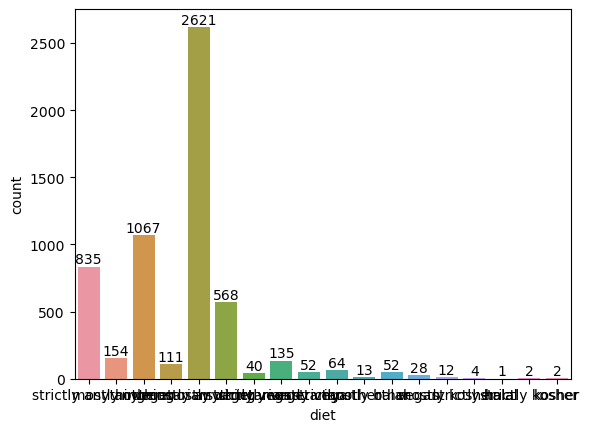

In [12]:
ax=sns.countplot(x=df["diet"])
ax.bar_label(ax.containers[0]);

In [13]:
df["drugs"].value_counts()

never        5972
sometimes    1181
often          62
Name: drugs, dtype: int64

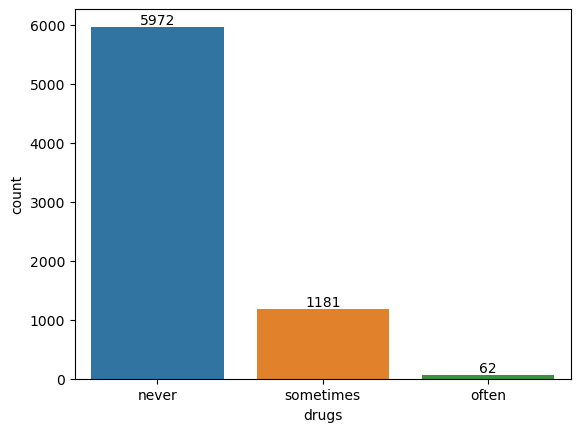

In [14]:
ax=sns.countplot(x=df["drugs"])
ax.bar_label(ax.containers[0]);

In [15]:
df["education"].value_counts()

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [16]:
df["ethnicity"].value_counts()

white                                                                5278
asian                                                                 863
hispanic / latin                                                      426
black                                                                 326
other                                                                 319
                                                                     ... 
native american, pacific islander, hispanic / latin, white, other       1
indian, pacific islander                                                1
asian, middle eastern, black                                            1
asian, middle eastern, indian                                           1
middle eastern, hispanic / latin, white, other                          1
Name: ethnicity, Length: 112, dtype: int64

In [17]:
df["job"].value_counts()

other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: job, dtype: int64

In [18]:
df["location"].value_counts()

san francisco, california    4835
oakland, california          1181
berkeley, california          768
san mateo, california         207
palo alto, california         170
                             ... 
boulder, colorado               1
san geronimo, california        1
petaluma, california            1
santa cruz, california          1
madrid, spain                   1
Name: location, Length: 89, dtype: int64

In [19]:
df["offspring"].value_counts()

doesn&rsquo;t have kids                                1224
doesn&rsquo;t have kids, but might want them            620
doesn&rsquo;t have kids, but wants them                 578
doesn&rsquo;t want kids                                 454
has a kid                                               304
has kids                                                291
doesn&rsquo;t have kids, and doesn&rsquo;t want any     172
has kids, but doesn&rsquo;t want more                    68
has a kid, but doesn&rsquo;t want more                   41
has a kid, and might want more                           36
wants kids                                               29
might want kids                                          28
has kids, and might want more                            24
has a kid, and wants more                                12
has kids, and wants more                                  5
Name: offspring, dtype: int64

In [20]:
df["orientation"].value_counts()

straight    8191
gay          897
bisexual     426
Name: orientation, dtype: int64

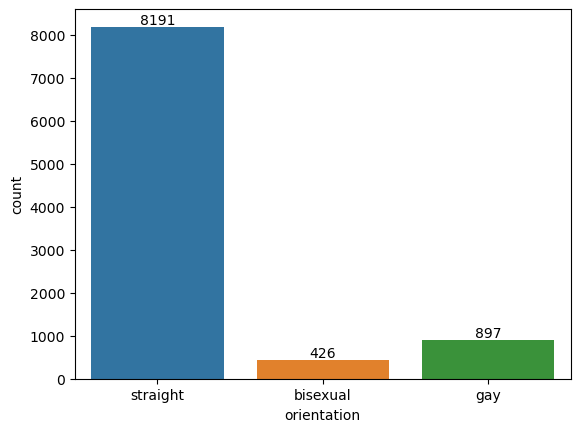

In [21]:
ax=sns.countplot(x=df["orientation"])
ax.bar_label(ax.containers[0]);

In [22]:
df["pets"].value_counts()

likes dogs and likes cats          2314
likes dogs                         1152
has dogs                            683
likes dogs and has cats             674
has dogs and likes cats             384
likes dogs and dislikes cats        301
has dogs and has cats               226
has cats                            221
likes cats                          200
has dogs and dislikes cats           82
dislikes dogs and dislikes cats      42
dislikes dogs and likes cats         36
dislikes cats                        20
dislikes dogs and has cats           13
dislikes dogs                         4
Name: pets, dtype: int64

In [23]:
df["religion"].value_counts()

agnosticism                                   448
other                                         417
agnosticism but not too serious about it      400
agnosticism and laughing about it             386
catholicism but not too serious about it      367
atheism                                       363
atheism and laughing about it                 329
other and laughing about it                   325
christianity but not too serious about it     320
christianity                                  297
other but not too serious about it            243
judaism but not too serious about it          232
atheism but not too serious about it          200
catholicism                                   165
atheism and somewhat serious about it         138
christianity and somewhat serious about it    133
other and somewhat serious about it           122
catholicism and laughing about it             117
judaism and laughing about it                 113
agnosticism and somewhat serious about it     105


In [24]:
df["sex"].value_counts()

m    5675
f    3839
Name: sex, dtype: int64

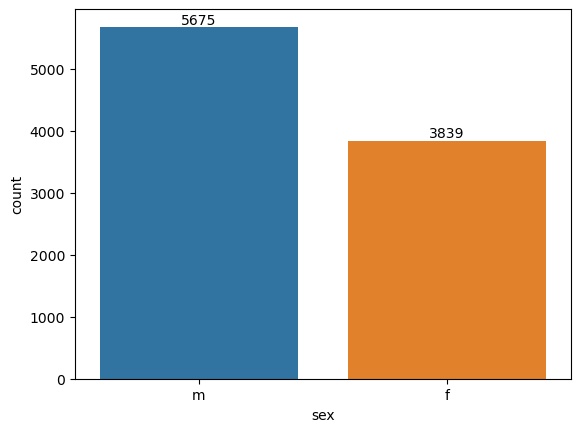

In [25]:
ax=sns.countplot(x=df["sex"])
ax.bar_label(ax.containers[0]);

In [26]:
df["sign"].value_counts()

leo and it&rsquo;s fun to think about            277
taurus and it&rsquo;s fun to think about         275
gemini and it&rsquo;s fun to think about         271
cancer and it&rsquo;s fun to think about         260
scorpio and it&rsquo;s fun to think about        258
libra and it&rsquo;s fun to think about          257
virgo and it&rsquo;s fun to think about          257
pisces and it&rsquo;s fun to think about         253
aries and it&rsquo;s fun to think about          252
aries but it doesn&rsquo;t matter                250
aquarius but it doesn&rsquo;t matter             250
sagittarius and it&rsquo;s fun to think about    242
leo but it doesn&rsquo;t matter                  239
virgo but it doesn&rsquo;t matter                236
aquarius and it&rsquo;s fun to think about       235
gemini but it doesn&rsquo;t matter               235
cancer but it doesn&rsquo;t matter               233
taurus but it doesn&rsquo;t matter               222
sagittarius but it doesn&rsquo;t matter       

In [27]:
df["smokes"].value_counts()

no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: smokes, dtype: int64

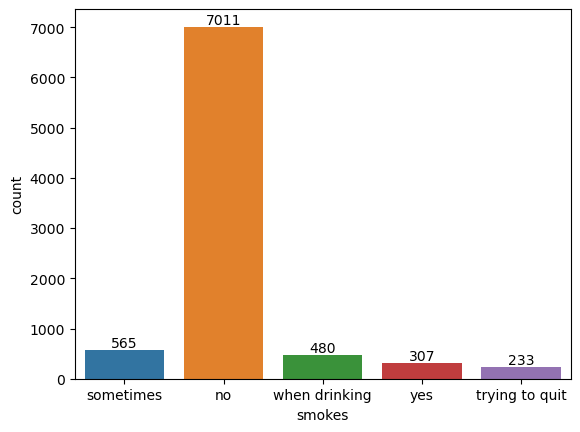

In [28]:
ax=sns.countplot(x=df["smokes"])
ax.bar_label(ax.containers[0]);

In [29]:
df["speaks"].value_counts()

english                                                                                3415
english (fluently)                                                                     1106
english (fluently), spanish (okay)                                                      322
english (fluently), spanish (poorly)                                                    321
english (fluently), spanish (fluently)                                                  195
                                                                                       ... 
english (fluently), hindi (fluently), spanish (okay)                                      1
english (fluently), danish (fluently), spanish (okay), german (poorly)                    1
english (fluently), spanish (fluently), portuguese                                        1
english (fluently), arabic (fluently), spanish (okay), urdu (okay), gujarati (okay)       1
english (fluently), french (okay), swedish (poorly)                             

In [30]:
df["status"].value_counts()

single            8909
seeing someone     289
available          270
married             46
Name: status, dtype: int64

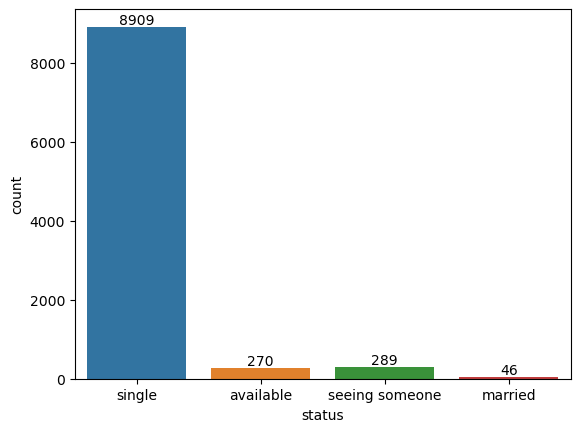

In [31]:
ax=sns.countplot(x=df["status"])
ax.bar_label(ax.containers[0]);

# FEATURE ENGINEERING

In [32]:
df['text'] = df['essay0'].astype(str) + ' ' + df['essay1'] + ' ' + df['essay2']+ ' ' + df['essay3']+ ' ' +df['essay4']+ ' ' + df['essay5']+ ' ' + df['essay6']+ ' ' + df['essay7']+ ' ' + df['essay8']+ ' ' + df['essay9']
df.drop(columns=['essay0', 'essay1', 'essay2', "essay3", "essay4","essay5","essay6","essay7","essay8","essay9"], inplace=True)

In [33]:
df.head(2)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,text
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,about me:<br />\n<br />\ni would love to think...
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,NaN


In [34]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,text
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,about me:<br />\n<br />\ni would love to think...
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,NaN
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,NaN
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,NaN
4,29.0,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,NaN


In [35]:
from textblob import TextBlob

In [36]:
df["text"]= df["text"].str.lower() #kucuk harfe donusturduk
df["text"]= df["text"].str.replace('[^\w\s]','')#noktalama işaretlerini kaldır
df["text"]= df["text"].str.replace('\n','') # slash n leri bul kaldır boşlukları bul kaldır
df["text"]= df["text"].str.replace('\d+','') #rakamları bul kaldır
df["text"]= df["text"].str.replace('\r','') #satırbaslarını kaldır

In [37]:
 # Duygu analizini gerçekleştirme
def duygu_analizi(metin):
    if metin is not None:  # Boş değeri kontrol etme
        metin = str(metin)  # Veriyi stringe dönüştürme
        analiz = TextBlob(metin)
        if analiz.sentiment.polarity > 0:
            return "Pozitif"
        elif analiz.sentiment.polarity < 0:
            return "Negatif"
        else:
            return "Nötr"
    else:
        return None  # Boş değerler için None döndürme

# Metinlerdeki boş değerleri temizleme ve duygu analiz sonuçlarını yeni bir kolona yazma
df['duygu_analizi'] = df['text'].fillna("").apply(duygu_analizi)
df.drop(columns=['text'], inplace=True)


In [38]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,duygu_analizi
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,Pozitif
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,Nötr
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,Nötr
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,Nötr
4,29.0,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,Nötr


In [39]:
def kusak_bul(yas):
    if 18 <= yas <= 32:
        return "Y kuşağı"
    elif 0 <= yas <=17:
        return "Z kuşağı"
    elif 33 <= yas <= 47:
        return "X kuşağı"
    elif 48 <= yas <= 70:
        return "Boomers"
    else:
        return "Bilinmeyen"

In [40]:
df['kusağa_aitlik'] = df['age'].apply(kusak_bul)

In [41]:
for column in df.columns:
    if column != 'text': #saleprice kolonu hariç her kolona data encoding yapıyorum
        value_counts = df[column].value_counts()
        num_categories = len(value_counts)
        
        # İki alt kategorisi varsa 0 ve 1 olarak kodlayalım
        if num_categories == 2:
            category_mapping = {category: index for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)
        # İki alt kategoriden fazlaysa 1'den başlayan sıralı sayılarla kodlayalım
        else:
            category_mapping = {category: index + 1 for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)

In [42]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,duygu_analizi,kusağa_aitlik
0,12.0,6.0,3.0,1.0,1.0,3.0,8.0,14.0,1.0,18.0,3937.0,22.0,2.0,1.0,1.0,32.0,0.0,33.0,2.0,1.0,1.0,2,2
1,14.0,1.0,5.0,3.0,2.0,15.0,1.0,1.0,4.0,12.0,208.0,2.0,2.0,1.0,1.0,3.0,0.0,26.0,1.0,33.0,1.0,1,3
2,18.0,4.0,2.0,1.0,NaN,2.0,NaN,2.0,1.0,NaN,4886.0,1.0,NaN,1.0,8.0,NaN,0.0,23.0,1.0,383.0,3.0,1,3
3,9.0,4.0,7.0,1.0,NaN,3.0,1.0,6.0,2.0,2.0,4885.0,3.0,4.0,1.0,9.0,NaN,0.0,29.0,1.0,42.0,1.0,1,2
4,6.0,3.0,NaN,1.0,1.0,1.0,60.0,7.0,1.0,4.0,629.0,1.0,NaN,1.0,1.0,NaN,0.0,27.0,1.0,1.0,1.0,1,2


In [43]:
df.fillna(0, inplace=True)

In [44]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,duygu_analizi,kusağa_aitlik
0,12.0,6.0,3.0,1.0,1.0,3.0,8.0,14.0,1.0,18.0,3937.0,22.0,2.0,1.0,1.0,32.0,0.0,33.0,2.0,1.0,1.0,2,2
1,14.0,1.0,5.0,3.0,2.0,15.0,1.0,1.0,4.0,12.0,208.0,2.0,2.0,1.0,1.0,3.0,0.0,26.0,1.0,33.0,1.0,1,3
2,18.0,4.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,4886.0,1.0,0.0,1.0,8.0,0.0,0.0,23.0,1.0,383.0,3.0,1,3
3,9.0,4.0,7.0,1.0,0.0,3.0,1.0,6.0,2.0,2.0,4885.0,3.0,4.0,1.0,9.0,0.0,0.0,29.0,1.0,42.0,1.0,1,2
4,6.0,3.0,0.0,1.0,1.0,1.0,60.0,7.0,1.0,4.0,629.0,1.0,0.0,1.0,1.0,0.0,0.0,27.0,1.0,1.0,1.0,1,2


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x=df.drop("age", axis=1)
y=df["age"]

In [47]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((48441, 22), (12111, 22), (48441,), (12111,))

# Regression

In [49]:

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

In [50]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [51]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.885145,2.013032,0.595135
XGradientBooting,0.880771,2.051003,0.605356
Linear,0.847649,2.318455,0.728210
Ridge,0.847648,2.318463,0.728195
Extra Tree,0.741874,3.017810,0.859632
Lasso,0.638041,3.573593,1.257738
ElasticNet,0.578864,3.854664,1.344641


# Classification

In [52]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,duygu_analizi,kusağa_aitlik
0,12.0,6.0,3.0,1.0,1.0,3.0,8.0,14.0,1.0,18.0,3937.0,22.0,2.0,1.0,1.0,32.0,0.0,33.0,2.0,1.0,1.0,2,2
1,14.0,1.0,5.0,3.0,2.0,15.0,1.0,1.0,4.0,12.0,208.0,2.0,2.0,1.0,1.0,3.0,0.0,26.0,1.0,33.0,1.0,1,3
2,18.0,4.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,4886.0,1.0,0.0,1.0,8.0,0.0,0.0,23.0,1.0,383.0,3.0,1,3
3,9.0,4.0,7.0,1.0,0.0,3.0,1.0,6.0,2.0,2.0,4885.0,3.0,4.0,1.0,9.0,0.0,0.0,29.0,1.0,42.0,1.0,1,2
4,6.0,3.0,0.0,1.0,1.0,1.0,60.0,7.0,1.0,4.0,629.0,1.0,0.0,1.0,1.0,0.0,0.0,27.0,1.0,1.0,1.0,1,2


In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [54]:
x=df.drop('kusağa_aitlik',axis=1) 
y=df['kusağa_aitlik']

In [55]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [56]:
tahmin1=g.predict(x)
tahmin2=b.predict(x)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [58]:
accuracy_score(tahmin1,y)

0.97108270577355

In [59]:
confusion_matrix(tahmin1,y)

array([[51038,     0,     0,     0],
       [    0,  5412,   932,     1],
       [    0,   590,  1664,    57],
       [    1,    45,   125,   687]])

In [60]:
print(classification_report(tahmin1,y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     51038
           2       0.89      0.85      0.87      6345
           3       0.61      0.72      0.66      2311
           4       0.92      0.80      0.86       858

    accuracy                           0.97     60552
   macro avg       0.86      0.84      0.85     60552
weighted avg       0.97      0.97      0.97     60552



In [61]:
accuracy_score(tahmin2,y)

0.942726912405866

In [62]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [63]:
k.fit(x,y)

KNeighborsClassifier()

In [64]:
tahmin3=k.predict(x)

In [65]:
accuracy_score(tahmin3,y)

0.965021799445105

In [66]:
confusion_matrix(tahmin3,y)

array([[51038,     0,     0,     0],
       [    0,  5689,  1288,   194],
       [    0,   351,  1425,   269],
       [    1,     7,     8,   282]])

In [67]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [68]:
l.fit(x,y)

LogisticRegression()

In [69]:
tahmin4=l.predict(x)

In [70]:
confusion_matrix(tahmin4,y)

array([[51038,     0,     0,     0],
       [    0,  5028,   644,     1],
       [    0,   839,  1676,   325],
       [    1,   180,   401,   419]])

In [71]:
accuracy_score(tahmin4,y)

0.9605132778438367

In [72]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [73]:
d.fit(x,y)

DecisionTreeClassifier()

In [74]:
tahmin5=d.predict(x)

In [75]:
accuracy_score(tahmin5,y)

1.0

In [76]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [77]:
r.fit(x,y)

RandomForestClassifier()

In [78]:
tahmin6=r.predict(x)

In [79]:
accuracy_score(tahmin6,y)

1.0

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [81]:
gb.fit(x,y)

GradientBoostingClassifier()

In [82]:
tahmin7=gb.predict(x)

In [83]:
accuracy_score(tahmin7,y)

1.0

In [84]:
confusion_matrix(tahmin7,y)

array([[51039,     0,     0,     0],
       [    0,  6047,     0,     0],
       [    0,     0,  2721,     0],
       [    0,     0,     0,   745]])